# Qiskit implementation of the lecture's content

In [1]:
from qiskit import __version__
print(__version__)

1.3.2


## Vectors and matrices in Python

In [13]:
import numpy as np

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])
print(ket0 / 2 + ket1 / 2)

M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M, '\n')

# matrix and vector multiplication
print('Matrix and vector multiplication')
print('In Numpy format:')
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))


# displaying nicely using qiskit visualization library
from qiskit.visualization import array_to_latex

print('Using qiskit.visualization:')
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

[[0.5]
 [0.5]]
[[1.  0.5]
 [0.  0.5]] 

Matrix and vector multiplication
In Numpy format:
[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]
Using qiskit.visualization:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## States, measurements, and operations

##### Defining and displaying state vectors

In [17]:
from qiskit.quantum_info import Statevector

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

# Nice ways to display state vectors:
print('Nice ways to display state vectors:')
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

# Check-method to see if a given vector is a valid QSV
print('\n\nCheck-method to see if a given vector is a valid QSV')
display(u.is_valid())
display(w.is_valid())

Nice ways to display state vectors:


[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


Check-method to see if a given vector is a valid QSV


True

False

##### Simulating measurements using `Statevector`

In [22]:
print('Using vector:')
display(v.draw("latex"))

outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Using vector:


<IPython.core.display.Latex object>

Measured: 0
Post-measurement state:


<IPython.core.display.Latex object>

In [23]:
print('And when performed on an invalud QSV:')
outcome, state = w.measure()
# print(f"Measured: {outcome}\nPost-measurement state:")
# display(state.draw("latex"))

And when performed on an invalud QSV:


ValueError: Probabilities do not sum to 1. See Notes section of docstring for more information.

And option for plotting the results:


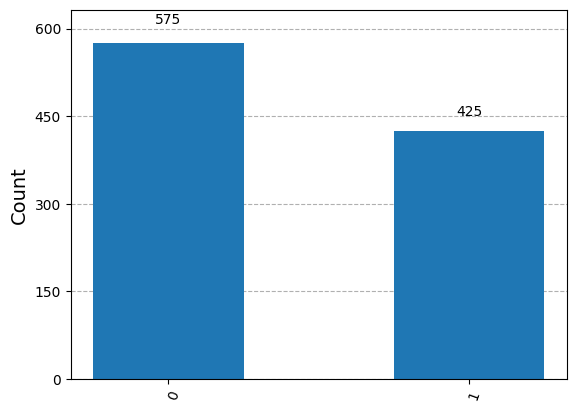

In [24]:
from qiskit.visualization import plot_histogram

print('And option for plotting the results:')
statistics = v.sample_counts(1000)
plot_histogram(statistics)

##### Performing operations with  `Operator`  and  `Statevector`

In [26]:
from qiskit.quantum_info import Operator

Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [27]:
v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)

display(v.draw("latex"))

<IPython.core.display.Latex object>

## Looking ahead toward quantum circuits

Nice way to visualizing circuits:


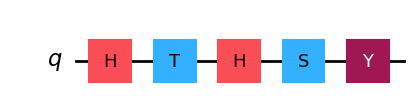




As well as dosplaying the resulting unitary operator:


<IPython.core.display.Latex object>

In [30]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)

print('Nice way to visualizing circuits:')
display(circuit.draw(output="mpl"))
print('\n\n')

print('As well as dosplaying the resulting unitary operator:')
display(Operator.from_circuit(circuit).draw("latex"))

Finally, one can initialize a starting quantum state vector and then evolve that state according to the sequence of operations described by the circuit


<IPython.core.display.Latex object>

And simulate the result:


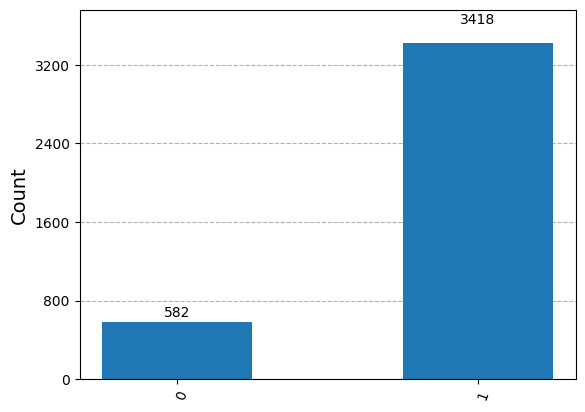

In [33]:
print('Finally, one can initialize a starting quantum state vector and then',
      'evolve that state according to the sequence of operations described by',
      'the circuit')

ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

print('And simulate the result:')
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))